## Data analysis of Strathclyde Refit Data

### Set Up

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import pandas as pd
import os
fp=r'C:\Users\cvyb\OneDrive - Loughborough University\ERBE_YB\Energy Analysis\Course Work\CLEAN_REFIT_081116'

## Data processing

### This loads the data, resamples it to half hour intervals and saves the new data files.

In [4]:
df

'C:\\Users\\cvyb\\OneDrive - Loughborough University\\ERBE_YB\\Energy Analysis\\Course Work\\CLEAN_REFIT_081116'

In [5]:
flag=True
for filename in os.listdir(fp):
    print(filename)
    path=os.path.join(fp,filename)
    df=pd.read_csv(path,parse_dates=['Time'])
    df=df.set_index('Time')
    df=df.resample('30T').mean()
    df=df.reset_index()
    df['file']=filename
    if flag:
        df2=df
        flag=False
    else:
        df2=df2.append(df)
df2.to_csv('NewData.csv')

CLEAN_House1.csv
CLEAN_House10.csv
CLEAN_House11.csv
CLEAN_House12.csv
CLEAN_House13.csv
CLEAN_House15.csv
CLEAN_House16.csv
CLEAN_House17.csv
CLEAN_House18.csv
CLEAN_House19.csv
CLEAN_House2.csv
CLEAN_House20.csv
CLEAN_House21.csv
CLEAN_House3.csv
CLEAN_House4.csv
CLEAN_House5.csv
CLEAN_House6.csv
CLEAN_House7.csv
CLEAN_House8.csv
CLEAN_House9.csv


### Import Combine Data

In [8]:
mydf = pd.read_csv('NewData.csv')

In [9]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522113 entries, 0 to 522112
Data columns (total 15 columns):
Unnamed: 0    522113 non-null int64
Time          522113 non-null object
Unix          462255 non-null float64
Aggregate     462255 non-null float64
Appliance1    462255 non-null float64
Appliance2    462255 non-null float64
Appliance3    462255 non-null float64
Appliance4    462255 non-null float64
Appliance5    462255 non-null float64
Appliance6    462255 non-null float64
Appliance7    462255 non-null float64
Appliance8    462255 non-null float64
Appliance9    462255 non-null float64
Issues        462255 non-null float64
file          522113 non-null object
dtypes: float64(12), int64(1), object(2)
memory usage: 59.8+ MB


### Present Data in Daily Energy Aggregate Consumption

In [7]:
df1=df1.resample('1D').mean()

NameError: name 'df1' is not defined

In [6]:
df1

NameError: name 'df1' is not defined

### Present Daily Energy Consumption Data as a Graph

PLOT_FILENAME: test.png


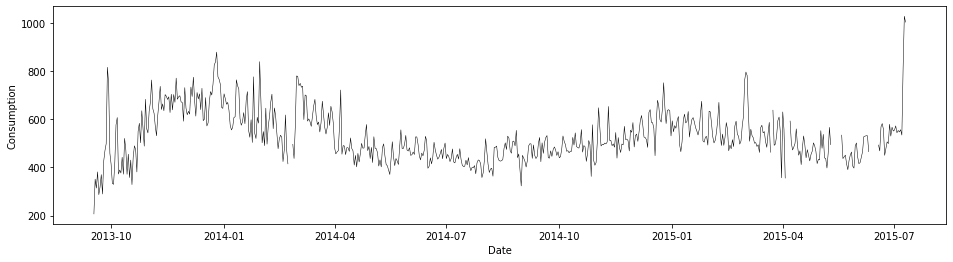

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(16,4))
ax.plot(df1,color='black',linewidth=0.5)
ax.set_xlabel('Date')
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Consumption')
plot_filename=r'test.png'
print('PLOT_FILENAME: '+plot_filename)
#plt.savefig(plot_filename, bbox_inches='tight')
plt.show()